<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/Framework/1_TensorFlow/05_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression 구현 해보기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.random.set_seed(777)

### 가상 데이터셋

In [2]:
lr = 0.03 #--> learning rate

W_true = 3.0 #--> Weights
B_true = 2.0 #--> Bias

In [3]:
X = tf.random.normal((500, 1)) #--> data 500개, feature 1개
noise = tf.random.normal((500, 1))

In [4]:
y = X * W_true + B_true + noise

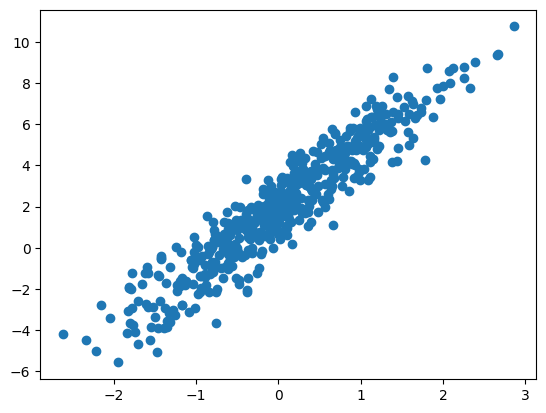

In [5]:
plt.scatter(X, y)
plt.show()

In [6]:
# 미분할 변수값

w = tf.Variable(5.)
b = tf.Variable(0.)

In [7]:
w_records = [w.numpy()]
b_records = [b.numpy()]
loss_records = []

for epoch in range(100):

    # 매 epoch마다 한 번씩 학습을 한다.
    with tf.GradientTape() as tape:
        y_hat = X * w + b # linear func (y = aX + b)
        loss = tf.reduce_mean(tf.square((y - y_hat)))

    dw, db = tape.gradient(loss, [w, b])

    w.assign_sub(lr * dw) #--> _sub: 음수 적용
    b.assign_sub(lr * db)

    # 학습 과정 기록
    loss_records.append(loss.numpy())
    w_records.append(w.numpy())
    b_records.append(b.numpy())

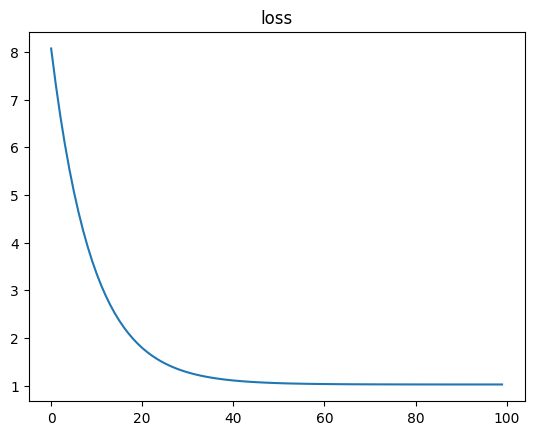

In [8]:
plt.plot(loss_records)
plt.title('loss')
plt.show()

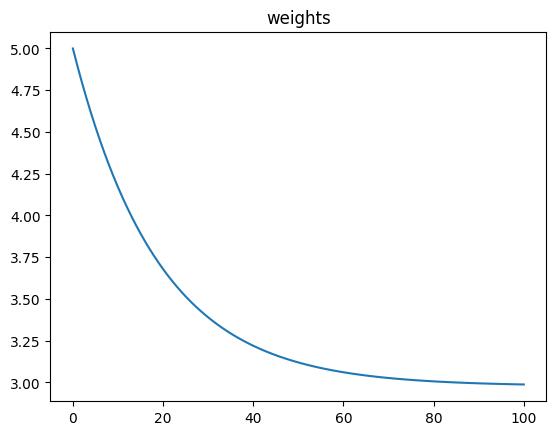

In [10]:
plt.plot(w_records)
plt.title('weights')
plt.show()

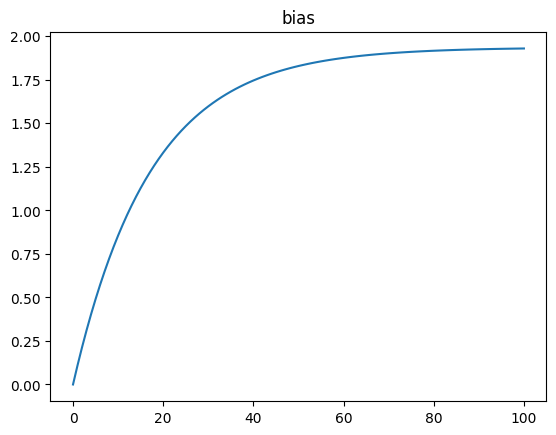

In [11]:
plt.plot(b_records)
plt.title('bias')
plt.show()

### Dataset 당뇨병 진행도 예측 하기

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names, dtype=np.float32)
df['const'] = np.ones(df.shape[0]) #--> bias
# df.tail(3)

In [13]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,const
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,1.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,1.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,1.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,1.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,1.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,1.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,1.0


#### 방식1. 가중치

- 먼저 추정 가중치를 계산식을 이용해 예측해본다.

- $X$ 를 Feature, $~w$를 가중치 벡터, $~y$를 Target이라고 할 때,

- $X^T X$의 역행령이 존재 한다고 가정했을 때,  

- 아래의 식을 이용해 $w$의 추정치 $w^*$를 구해봅시다.

$~~~~~~~~~~w^{\ast} = (X^TX)^{-1} X^T y$


-----

In [14]:
diabetes.target.shape

(442,)

In [15]:
X = df
y = np.expand_dims(diabetes.target, axis=1).astype(np.float32)
X.shape, y.shape

((442, 11), (442, 1))

- $~w^{\ast} = (X^TX)^{-1} X^T y $

In [16]:
# 수식 구현

XT = tf.transpose(X)
w = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)

In [26]:
y_pred = tf.matmul(X, w)
y_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[206.11667747],
       [ 68.07103311],
       [176.8827902 ],
       [166.91445692],
       [128.4622584 ],
       [106.3519149 ],
       [ 73.89134423],
       [118.8542283 ],
       [158.80889671],
       [213.58462208]])>

In [24]:
y[:10]

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.]], dtype=float32)

In [27]:
print("예측한 진행도 :", y_pred[0].numpy(),  "실제 진행도 :", y[0])
print("예측한 진행도 :", y_pred[19].numpy(), "실제 진행도 :", y[19])
print("예측한 진행도 :", y_pred[31].numpy(), "실제 진행도 :", y[31])

예측한 진행도 : [206.11667747] 실제 진행도 : [151.]
예측한 진행도 : [124.01754101] 실제 진행도 : [168.]
예측한 진행도 : [69.47575835] 실제 진행도 : [59.]


In [28]:
y_pred = tf.squeeze(tf.matmul(X, w), axis=1)

In [29]:
print("예측한 진행도 :", y_pred[0].numpy(),  "실제 진행도 :", diabetes.target[0])
print("예측한 진행도 :", y_pred[19].numpy(), "실제 진행도 :", diabetes.target[19])
print("예측한 진행도 :", y_pred[31].numpy(), "실제 진행도 :", diabetes.target[31])

예측한 진행도 : 206.11667746769763 실제 진행도 : 151.0
예측한 진행도 : 124.01754101375538 실제 진행도 : 168.0
예측한 진행도 : 69.47575835406316 실제 진행도 : 59.0


#### 방식2. SGD

- 이번에는, SGD 방식으로 구현해 예측해본다.

- Conditions
    - steepest gradient descents(전체 데이터 사용)
    - 가중치는 Gaussian normal distribution에서의 난수로 초기화함.
    - step size  == 0.03
    - 100 iteration

In [32]:
lr = 0.03
num_epochs = 100

In [30]:
X.shape, df.shape

((442, 11), (442, 11))

In [31]:
X.shape[1], X.shape[-1]

(11, 11)

In [34]:
X.dtypes

age      float32
sex      float32
bmi      float32
bp       float32
s1       float32
s2       float32
s3       float32
s4       float32
s5       float32
s6       float32
const    float64
dtype: object

In [33]:
w_init = tf.random.normal([X.shape[1], 1], dtype=tf.float64)
w = tf.Variable(w_init)

In [35]:
for i in range(num_epochs):
    with tf.GradientTape() as tape:
        y_hat = tf.matmul(X, w)
        loss = tf.reduce_mean((y_hat - y)**2)

    grad = tape.gradient(loss, w)
    w.assign_add(-lr * grad)

In [36]:
print("예측한 진행도 :", y_hat[0].numpy(),  "실제 진행도 :", diabetes.target[0])
print("예측한 진행도 :", y_hat[19].numpy(), "실제 진행도 :", diabetes.target[19])
print("예측한 진행도 :", y_hat[31].numpy(), "실제 진행도 :", diabetes.target[31])

예측한 진행도 : [153.11637599] 실제 진행도 : 151.0
예측한 진행도 : [149.73239217] 실제 진행도 : 168.0
예측한 진행도 : [147.66033944] 실제 진행도 : 59.0
